In [1]:
# !pip3 install scikit-learn matplotlib pandas numpy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.df = pd.read_csv("./datasets/data_social_network_ads.csv")

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
df.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [8]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [9]:
df = df.dropna()

In [10]:
categorical_cols = df.select_dtypes(include=["object"]).columns
categorical_cols

Index(['Gender'], dtype='object')

In [11]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

label_encoders

{'Gender': LabelEncoder()}

In [12]:
# Feature scaling
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [13]:
# Selecting features
features = df.loc[:, df.columns != "Purchased"]
y = np.asarray(df["Purchased"]).astype(int)

In [14]:
print("Features shape ->", features.shape)
print("Y size ->", y.size)

Features shape -> (400, 4)
Y size -> 400


In [15]:
# Normalize features
features = preprocessing.StandardScaler().fit_transform(features)
features

array([[-0.93657932,  1.02020406, -1.78179743, -1.49004624],
       [ 1.66838653,  1.02020406, -0.25358736, -1.46068138],
       [-0.32087714, -0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.52039175, -0.98019606,  1.17910958, -1.46068138],
       [ 0.88695546,  1.02020406, -0.15807423, -1.07893824],
       [-1.36231017, -0.98019606,  1.08359645, -0.99084367]],
      shape=(400, 4))

In [16]:
from sklearn.model_selection import train_test_split

# Train-test split
train_x, test_x, train_y, test_y = train_test_split(
    features, y, test_size=0.2, random_state=20
)

In [17]:
# Print dataset split details
print("Train X dimensions: ", train_x.shape)
print("Train Y size      : ", train_y.size)
print("Test X dimensions : ", test_x.shape)
print("Test Y size       : ", test_y.size)

Train X dimensions:  (320, 4)
Train Y size      :  320
Test X dimensions :  (80, 4)
Test Y size       :  80


In [18]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=1, solver="liblinear").fit(train_x, train_y)
LR

LogisticRegression(C=1, solver='liblinear')

In [19]:
predictions = LR.predict(test_x)
predictions

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0])

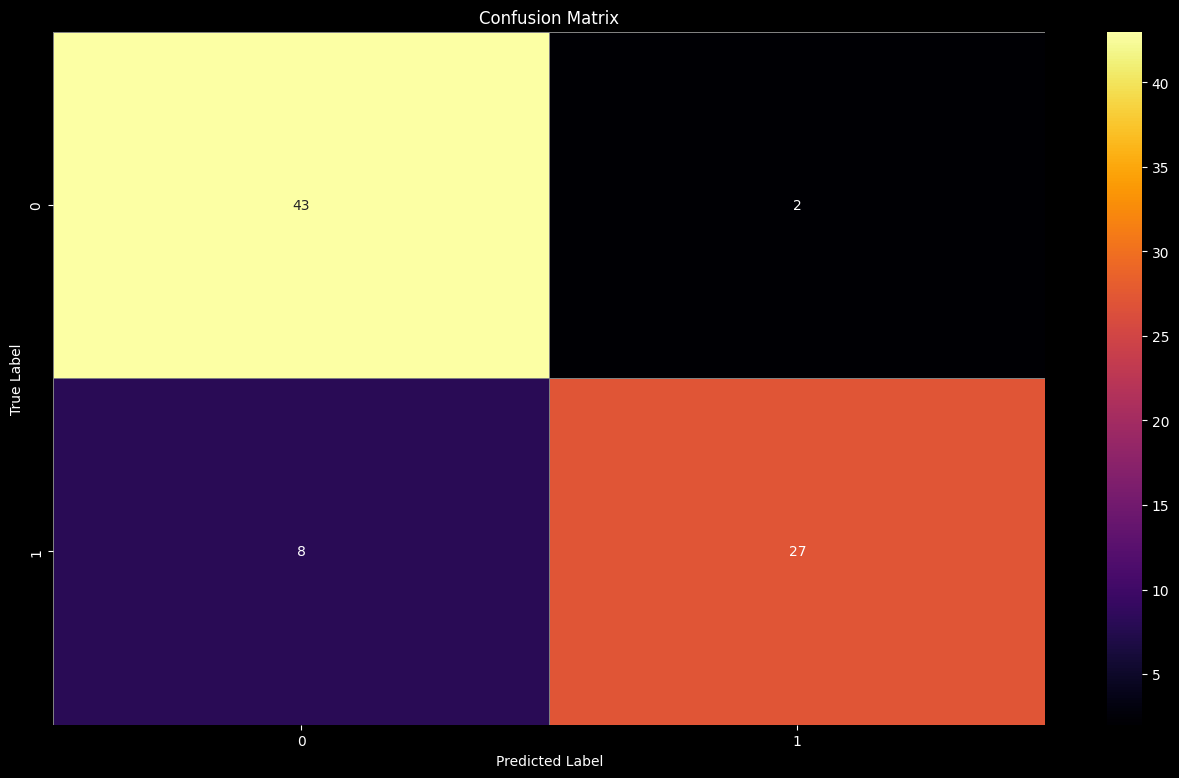

In [20]:
# Compute confusion matrix
cm = confusion_matrix(test_y, predictions)

# Plot the confusion matrix
plt.figure(figsize=(16, 9))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="inferno",
    xticklabels=[0, 1],
    yticklabels=[0, 1],
    linewidths=0.5,
    linecolor="grey",
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [21]:
print(f"TP = {cm[0][0]}\nFN = {cm[0][1]}\nFP = {cm[1][0]}\nTN = {cm[1][1]}")

TP = 43
FN = 2
FP = 8
TN = 27


In [22]:
predictions_prob = LR.predict_proba(test_x)
rounded_prob = np.round(predictions_prob, 5)
rounded_prob

array([[0.96587, 0.03413],
       [0.13194, 0.86806],
       [0.71959, 0.28041],
       [0.91765, 0.08235],
       [0.97368, 0.02632],
       [0.72742, 0.27258],
       [0.99467, 0.00533],
       [0.04216, 0.95784],
       [0.69972, 0.30028],
       [0.49612, 0.50388],
       [0.29592, 0.70408],
       [0.96828, 0.03172],
       [0.01857, 0.98143],
       [0.45824, 0.54176],
       [0.87923, 0.12077],
       [0.96439, 0.03561],
       [0.92708, 0.07292],
       [0.67264, 0.32736],
       [0.98963, 0.01037],
       [0.01655, 0.98345],
       [0.85685, 0.14315],
       [0.80996, 0.19004],
       [0.98995, 0.01005],
       [0.98988, 0.01012],
       [0.62403, 0.37597],
       [0.55833, 0.44167],
       [0.79725, 0.20275],
       [0.82321, 0.17679],
       [0.44697, 0.55303],
       [0.47405, 0.52595],
       [0.86868, 0.13132],
       [0.74687, 0.25313],
       [0.90697, 0.09303],
       [0.47265, 0.52735],
       [0.69803, 0.30197],
       [0.30326, 0.69674],
       [0.97862, 0.02138],
 

In [23]:
from sklearn.metrics import jaccard_score

jaccard_score_ = jaccard_score(test_y, predictions, pos_label=0)
print(f"Jaccard Score -> {round(jaccard_score_, 5)}")

Jaccard Score -> 0.81132


In [24]:
from sklearn.metrics import log_loss

log_loss_ = log_loss(test_y, predictions_prob)
print(f"Log Loss -> {round(log_loss_, 5)}")

Log Loss -> 0.31667


In [25]:
TP, FN, FP, TN = confusion_matrix(test_y, predictions).ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
error_rate = 1 - accuracy
print()
print("Accuracy ->", round(accuracy, 5))
print("Error Rate -> ", round(error_rate, 5))


Accuracy -> 0.875
Error Rate ->  0.125


In [26]:
# Precision
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = (2 * recall * precision) / (precision + recall)
print("Precision -> ", round(precision, 5))
print("Recall    -> ", round(recall, 5))
print("F1        -> ", round(f1, 5))

Precision ->  0.84314
Recall    ->  0.95556
F1        ->  0.89583


In [27]:
from sklearn.metrics import classification_report

report = classification_report(test_y, predictions, output_dict=True)

report_df = pd.DataFrame(report).transpose()
round(report_df, 5)

,precision,recall,f1-score,support
0,0.84314,0.95556,0.89583,45.000
1,0.93103,0.77143,0.84375,35.000
accuracy,0.87500,0.87500,0.87500,0.875
macro avg,0.88709,0.86349,0.86979,80.000
weighted avg,0.88159,0.87500,0.87305,80.000
